<a href="https://colab.research.google.com/github/koci1005/c-programming/blob/main/VGG16_MRI_Brain_Scan_(Tumour_or_Not).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MRI image for Brain tumor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the image data
from PIL import Image
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
normal_image = Image.open("/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/no/1 no.jpeg")
tumour_image = Image.open("/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/yes/Y1.jpg")

Text(0.5, 1.0, 'Tumour MRI-Scan')

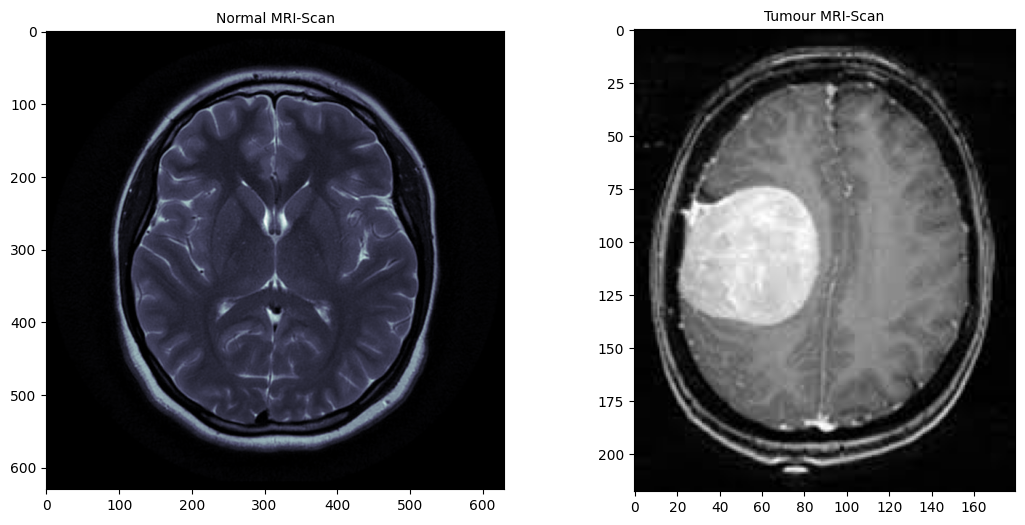

In [ ]:
fig = plt.figure(figsize = (13,6))
ax1 = fig.add_subplot(1, 2, 1)
img_plot = plt.imshow(normal_image, cmap = plt.cm.bone)
ax1.set_title("Normal MRI-Scan", fontsize = 10)

ax2 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(tumour_image)
ax2.set_title("Tumour MRI-Scan", fontsize = 10)

In [ ]:
import os

In [ ]:
yes = os.listdir('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/yes/')
no = os.listdir('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/no/')

In [ ]:
data = np.concatenate([yes, no])
data

array(['Y10.jpg', 'Y101.jpg', 'Y100.JPG', 'Y1.jpg', 'Y104.jpg',
       'Y105.jpg', 'Y102.jpg', 'Y106.jpg', 'Y103.jpg', 'Y111.JPG',
       'Y108.jpg', 'Y113.JPG', 'Y11.jpg', 'Y107.jpg', 'Y109.JPG',
       'Y112.JPG', 'Y114.JPG', 'Y13.jpg', 'Y120.JPG', 'Y115.JPG',
       'Y12.jpg', 'Y116.JPG', 'Y117.JPG', 'Y15.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y153.jpg', 'Y148.JPG', 'Y14.jpg', 'Y155.JPG',
       'Y158.JPG', 'Y159.JPG', 'Y156.JPG', 'Y157.JPG', 'Y16.JPG',
       'Y154.jpg', 'Y160.JPG', 'Y161.JPG', 'Y164.JPG', 'Y166.JPG',
       'Y162.jpg', 'Y168.jpg', 'Y163.JPG', 'Y167.JPG', 'Y165.JPG',
       'Y181.jpg', 'Y180.jpg', 'Y169.jpg', 'Y184.JPG', 'Y17.jpg',
       'Y182.JPG', 'Y18.JPG', 'Y170.JPG', 'Y183.jpg', 'Y188.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y19.JPG', 'Y185.jpg', 'Y193.JPG',
       'Y194.jpg', 'Y2.jpg', 'Y192.JPG', 'Y195.JPG', 'Y20.jpg', 'Y21.jpg',
       'Y243.JPG', 'Y22.jpg', 'Y244.JPG', 'Y23.JPG', 'Y24.jpg',
       'Y242.JPG', 'Y245.jpg', 'Y25.jpg', 'Y246.JPG', 'Y247.JPG',
   

In [ ]:
# target_yes = number of 'yes' images
target_yes = np.full(len(yes), 1)
# target_no = number of 'no' images
target_no = np.full(len(no), 0)

In [ ]:
target_yes, target_no

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

#### Image Target

In [ ]:
data_target = np.concatenate([target_yes, target_no])
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
data.shape

(253,)

In [ ]:
data_target.shape

(253,)

#### Generate Image Data

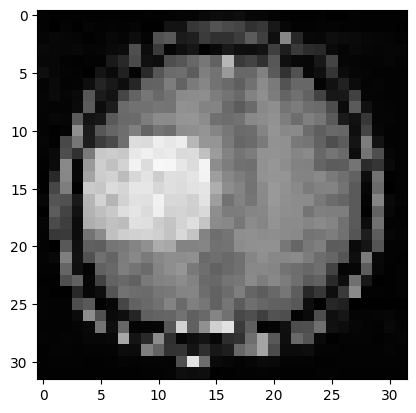

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/yes/Y1.jpg')
# resizing image data to 32 x 32
mri = cv2.resize(img, (32,32))
plt.imshow(mri)

In [ ]:
img.shape

(218, 180, 3)

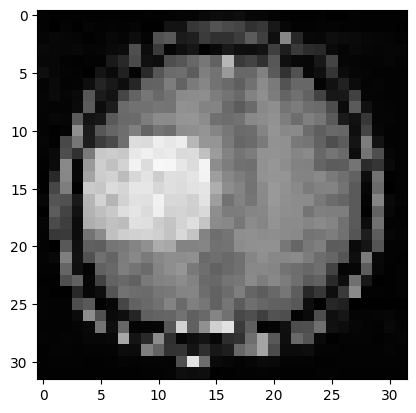

In [ ]:
# opencv(cv2) reads image data as B,G,R
b, g, r = cv2.split(mri)
img = cv2.merge([r, g, b])
plt.imshow(img)

In [ ]:
X_data = []
yes = os.listdir('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/yes/')
for file in yes:
    img = cv2.imread("/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/yes/" + file)
    # resizing image data to 32x32
    mri = cv2.resize(img, (32,32))
    b, g, r = cv2.split(mri)
    img = cv2.merge([r, g, b])
    X_data.append(img)

In [ ]:
no = os.listdir('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/no/')
for file in no:
    img = cv2.imread("/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/brain_tumor/no/" + file)
    # resizing image data to 32x32
    mri = cv2.resize(img, (32,32))
    b, g, r = cv2.split(mri)
    img = cv2.merge([r, g, b])
    X_data.append(img)         # This is list of all yes class images data in an array

In [ ]:
X_data

[array([[[23, 23, 23],
         [29, 29, 29],
         [29, 29, 29],
         ...,
         [24, 24, 24],
         [25, 25, 25],
         [23, 23, 23]],
 
        [[32, 32, 32],
         [27, 27, 27],
         [27, 27, 27],
         ...,
         [23, 23, 23],
         [27, 27, 27],
         [28, 28, 28]],
 
        [[32, 32, 32],
         [27, 27, 27],
         [27, 27, 27],
         ...,
         [23, 23, 23],
         [23, 23, 23],
         [28, 28, 28]],
 
        ...,
 
        [[28, 28, 28],
         [27, 27, 27],
         [27, 27, 27],
         ...,
         [23, 23, 23],
         [25, 25, 25],
         [28, 28, 28]],
 
        [[28, 28, 28],
         [27, 27, 27],
         [27, 27, 27],
         ...,
         [27, 27, 27],
         [25, 25, 25],
         [28, 28, 28]],
 
        [[23, 23, 23],
         [25, 25, 25],
         [25, 25, 25],
         ...,
         [22, 22, 22],
         [22, 22, 22],
         [21, 21, 21]]], dtype=uint8),
 array([[[1, 1, 1],
         [0, 0, 0],
  

#### Image Pixel Normalization

In [ ]:
X = np.array(X_data, dtype = 'float32')

In [ ]:
# Image pixel scaled between 0 and 1 - 0 - 255, 0-1
X /= 255

In [ ]:
X.shape

(253, 32, 32, 3)

#### Train & Test Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, data_target, test_size = 0.1, random_state = 3)

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 3)

#### VGG16 - Transfer Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Avoid overfitting by using BatchNormalization
from tensorflow.keras.applications import VGG16,DenseNet201
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def build_model():
    # Use imagenet - Pre-Trained model weights & this is know as knowledge transfer
    vgg16_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
    # Input Layer
    model = Sequential()
    # filters = Dimetionality , kernel size = (3,3)
    model.add(Conv2D(filters = 3, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))

    # Add Transfer Learning Model
    model.add(vgg16_model)

    # Average Pooling Layer
    model.add(GlobalAveragePooling2D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # Output Layer, units = num of classes
    model.add(Dense(units = 1, activation = 'sigmoid'))

    # Compiling CNN Model
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    return model

In [ ]:
model = build_model()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,717,333 (56.14 MB)

 Trainable params: 14,716,309 (56.14 MB)

 Non-trainable params: 1,024 (4.00 KB)

#### CallBacks

In [ ]:
from tensorflow.keras import callbacks
filepath = "/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/BestMRI.keras"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss',save_best_only=True, mode = 'min', verbose = 1)
checkpoint

In [ ]:
import datetime
logdir = os.path.join("/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/mri_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(logdir)

In [ ]:
history = model.fit(x_train2, y_train2, epochs = 200, batch_size = 16, shuffle = True, validation_data = (x_val, y_val),
                              callbacks = [checkpoint, tensorboard_callback], verbose = 1)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4773 - loss: 0.7614
Epoch 1: val_loss improved from inf to 898.30103, saving model to /content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/BestMRI.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4828 - loss: 0.7599 - val_accuracy: 0.6087 - val_loss: 898.3010
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6078 - loss: 0.7089
Epoch 2: val_loss did not improve from 898.30103
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6067 - loss: 0.7091 - val_accuracy: 0.6087 - val_loss: 6941.5029
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6039 - loss: 0.6663
Epoch 3: val_loss did not improve from 898.30103
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6035 - loss: 0.6659 - val_accuracy: 0.6087 - val_loss: 12574.0840
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6259 - loss: 0.6261
Epoch 4: val_loss did not improve from 898.30103
13/13 ━━━━━━━━━━

KeyboardInterrupt: 

# ECG report classification

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/ECG/mitbih_train.csv', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/15th_class/ECG/mitbih_test.csv', header=None)

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


#### EDA (Explaratory data analysis)

In [ ]:
train_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [ ]:
test_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [ ]:
train_data.shape

(87554, 188)

In [ ]:
# Classes of ECG Data
train_data.iloc[:, -1].unique()

array([0., 1., 2., 3., 4.])

#### An Electro Cardio Gram (ECG) is simple test that can be used to check your heart rhythm and electrical activity.

Classes = [N:0, S:1, V:2, F:3, Q:4] N: Non-ectopic beats (Normal Beats), - S: Supraventricular ectopic beats , V - Ventricular ectopic beats, F - Fusion Beats , Q - Unknown Beats

In [ ]:
train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int')

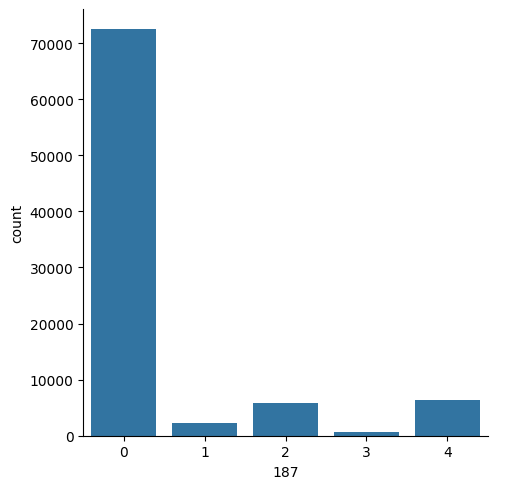

In [ ]:
# Display counts of classes
sns.catplot(x = 187, kind = 'count', data = train_data, height = 5)

In [ ]:
train_data[187].value_counts()

,count
187,
0,72471
4,6431
2,5788
1,2223
3,641


#### ECG Heartbeat Visualization

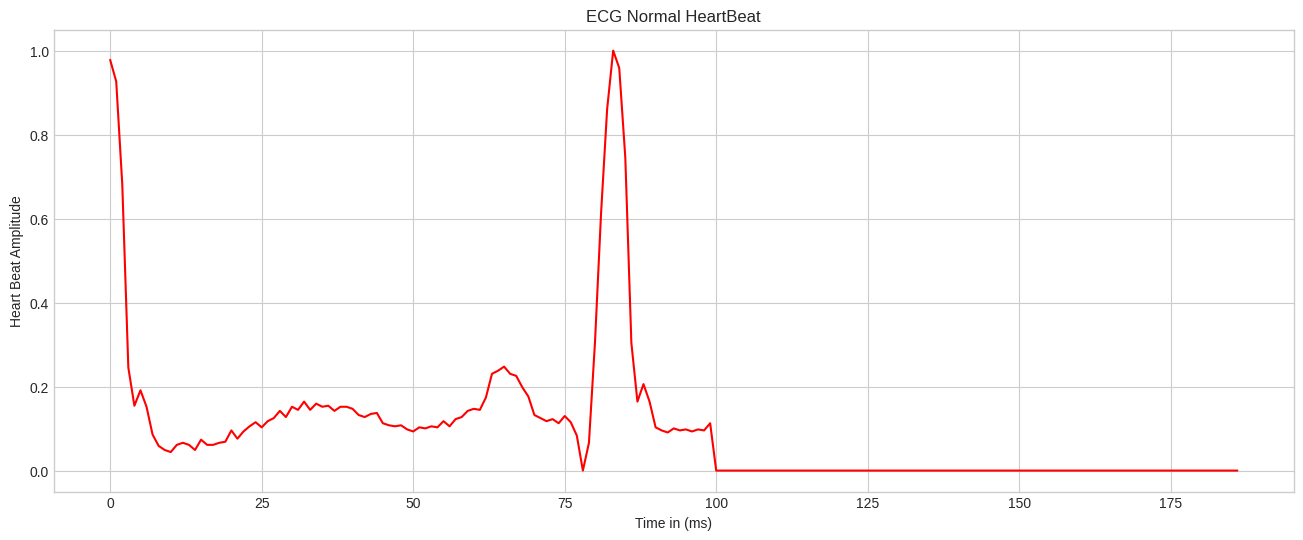

In [ ]:
import matplotlib.pyplot as plt

# Use updated seaborn style name
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.plot(train_data.iloc[0, 0:187], color='red')
plt.title('ECG Normal HeartBeat')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Amplitude')
plt.show()


In [ ]:
# Splitting data into various classes/labels
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

#### Compare different classes of HeartBeats.

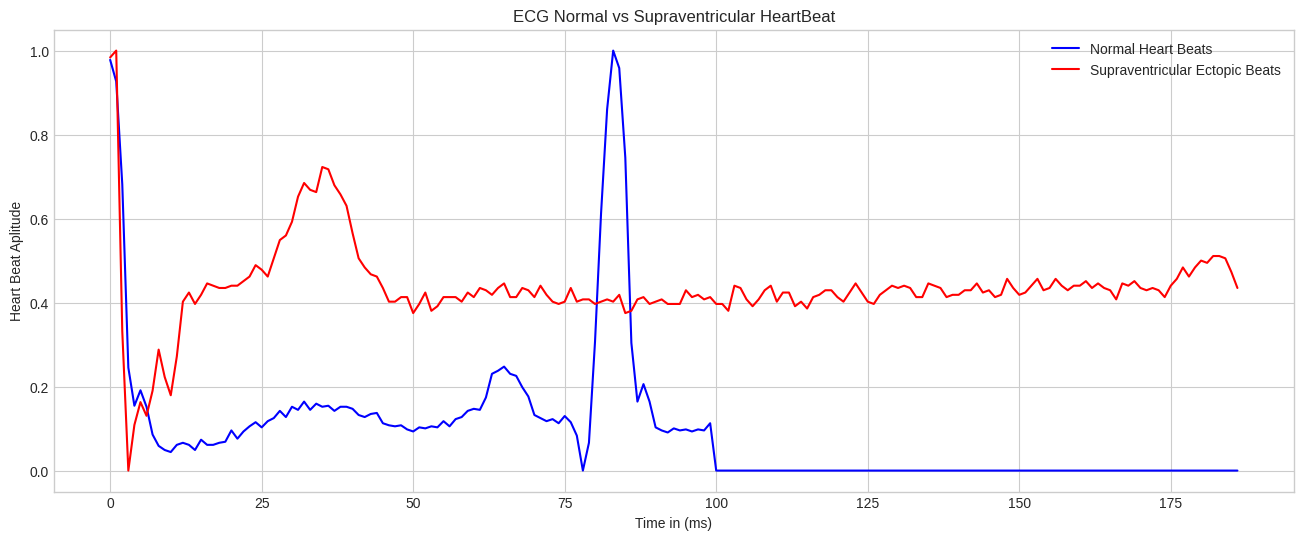

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize = (16,6))
plt.plot(train_data.iloc[0, 0:187], color = 'blue', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[1, 0:187], color = 'red', label = 'Supraventricular Ectopic Beats')
plt.title('ECG Normal vs Supraventricular HeartBeat')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.legend()
plt.show()

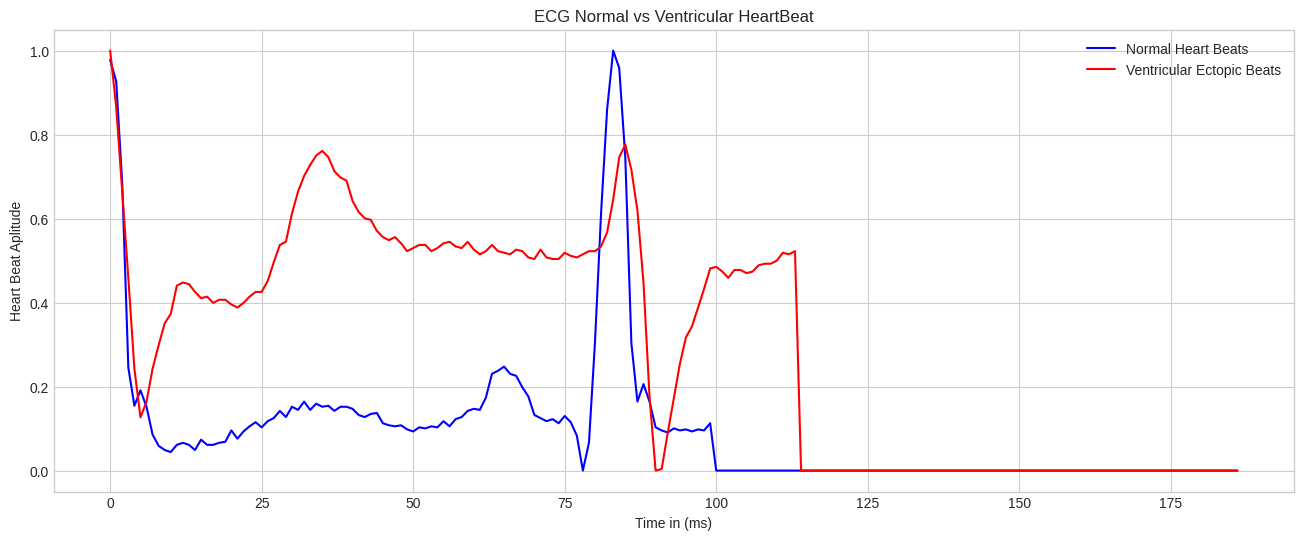

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize = (16,6))
plt.plot(train_data.iloc[0, 0:187], color = 'blue', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[1, 0:187], color = 'red', label = 'Ventricular Ectopic Beats')
plt.title('ECG Normal vs Ventricular HeartBeat')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.legend()
plt.show()

#### Resample

* Upsample dataset to handle class imbalance.

In [ ]:
from sklearn.utils import resample
df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [ ]:
# Randomnly select 20000 samples from class = 0 (downsample)
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 123)

In [ ]:
# Concate all dataframes for each classes & create a new train sample
train_df = pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
target_train = train_df[187]
target_test = test_data[187]

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(187), int64(1)
memory usage: 31.4 MB


In [ ]:
target_train

,187
14967,0
71482,0
23543,0
9174,0
42319,0
...,...
86326,4
87200,4
83385,4
87507,4


In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


#### Pre-processing Labels for Multi-Class Classification

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(target_train)

In [ ]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
y_train.shape

(100000, 5)

In [ ]:
y_test = to_categorical(target_test)
y_test.shape

(21892, 5)

In [ ]:
x_train = train_df.iloc[:, :-1].values
x_test = test_data.iloc[:, :-1].values

In [ ]:
# For Conv1D dimentionality must changed to (100000,187,1) , here 1 in last is dimentionality
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
x_train

array([[[1.        ],
        [0.6477024 ],
        [0.03938731],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.94661921],
        [0.65124553],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.8559671 ],
        [0.30246913],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.98465961],
        [0.93480343],
        [0.87535954],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.92543411],
        [0.87538302],
        [0.81205314],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.98628694],
        [0.93776369],
        [0.87341774],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [ ]:
x_test

array([[[1.        ],
        [0.75826448],
        [0.11157025],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.90842491],
        [0.7838828 ],
        [0.53113556],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.73008847],
        [0.21238938],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[1.        ],
        [0.96735907],
        [0.62017804],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.98412699],
        [0.5674603 ],
        [0.60714287],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.97396964],
        [0.91323209],
        [0.86550975],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

#### CNN 1D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
# Avoid overfitting using BatchNormalization
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def build_model():
    model = Sequential()
    # filters = Num of Neurons
    # Padding = 'same' (ZeroPadding), kener_size = odd shape of kernel matrix
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (187,1)))
    # BatchNormalization layer is used to avoid overfitting
    model.add(BatchNormalization())
    # Pooling
    model.add(MaxPooling1D(pool_size = (2), strides = (2), padding = 'same'))

    # Conv Layer - II
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size = (2), strides = (2), padding = 'same'))

    # Conv Layer - III
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size = (2), strides = (2), padding = 'same'))

    # Faltten
    model.add(Flatten())

    # Fully Connected Layer(FC)
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    # Output Layer, units = num of classes
    model.add(Dense(units = 5, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    return model

In [ ]:
model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 187, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 187, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 94, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 94, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 94, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 47, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 47, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,093 (566.77 KB)

 Trainable params: 144,709 (565.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
history = model.fit(x_train, y_train, epochs = 15, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 124s 37ms/step - accuracy: 0.8929 - loss: 0.2966 - val_accuracy: 0.9325 - val_loss: 0.1864
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 136s 35ms/step - accuracy: 0.9748 - loss: 0.0739 - val_accuracy: 0.9588 - val_loss: 0.1240
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 148s 37ms/step - accuracy: 0.9846 - loss: 0.0478 - val_accuracy: 0.9543 - val_loss: 0.1589
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 137s 36ms/step - accuracy: 0.9887 - loss: 0.0349 - val_accuracy: 0.9614 - val_loss: 0.1508
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 112s 36ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9740 - val_loss: 0.1086
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 143s 36ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9749 - val_loss: 0.1137
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 143s 36ms/step - accuracy: 0.9938 - loss: 0.0207 - val_accuracy: 0.9647 - val_loss: 0.1638
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 111s 36ms/step - accuracy: 